In [2]:
# Let us first import the modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import os
import warnings

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
#Change directory or path
os.chdir('E:\IMS Proschool\Linear regression')

In [5]:
# Let us read the data
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [6]:
# Before we go at univariate analysis let us look at data

test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
# Get the summary of the NUMERIC Columns
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
# To get the summary of all the cols
# Here we will get the NaN for the summary field which are not appropriate for that datatype
# of the column
test.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,FDN52,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


In [9]:
# Let us check the shape of data
# We can see we have huge data of 198K rows and 14 columns
test.shape

(5681, 11)

In [10]:
# Let us check if we have duplicate values in the columns
# We can check that orders are unique and other fields are not unique

test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [11]:
#Missing Value Imputation
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
train.shape

(8523, 12)

In [15]:
test.shape

(5681, 11)

In [16]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
#combine train and test data using append
np.min(train['Item_Outlet_Sales'])
np.max(train['Item_Outlet_Sales'])
bmart=train.append(test)

In [18]:
bmart.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [19]:
bmart.shape

(14204, 12)

In [52]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [20]:
#EDA Univariate analysis
bmart['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [21]:
bmart['Item_Fat_Content']=bmart['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')

In [22]:
bmart['Item_Fat_Content']=bmart['Item_Fat_Content'].replace(['reg'],'Regular')

In [23]:
np.round(bmart['Item_Fat_Content'].value_counts(normalize=True)*100,0)

Low Fat    65.0
Regular    35.0
Name: Item_Fat_Content, dtype: float64

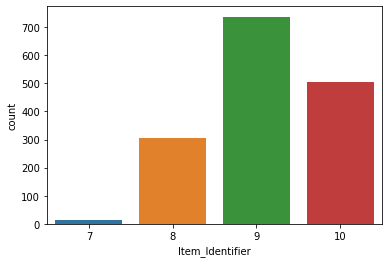

In [24]:
sns.countplot(bmart['Item_Identifier'].value_counts())

In [25]:
bmart['Item_Identifier'].str[:2].value_counts(normalize=True)

FD    0.718178
NC    0.189102
DR    0.092720
Name: Item_Identifier, dtype: float64

In [26]:
bmart['Item_MRP'].describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

sns.displot(bmart['Item_MRP'])

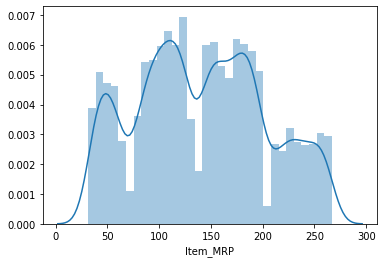

In [27]:
sns.distplot(bmart['Item_MRP'])

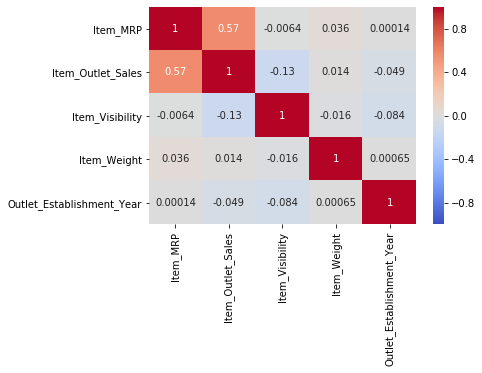

In [28]:
sns.heatmap(bmart.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='coolwarm')

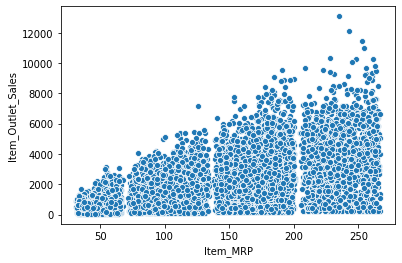

In [29]:
sns.scatterplot(bmart['Item_MRP'],bmart['Item_Outlet_Sales'])

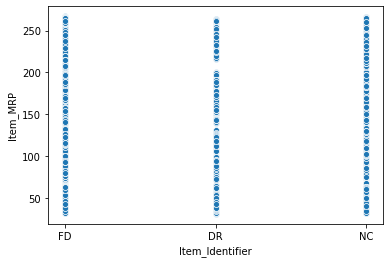

In [30]:
sns.scatterplot(bmart['Item_Identifier'].str[:2],bmart['Item_MRP'])


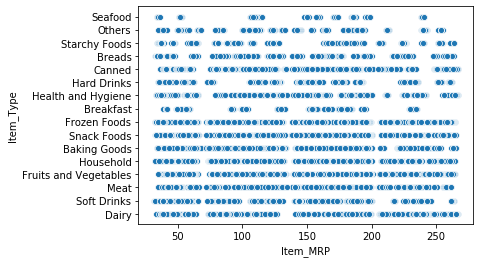

In [31]:
sns.scatterplot(bmart['Item_MRP'],bmart['Item_Type'])

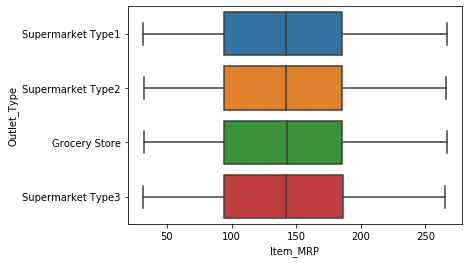

In [32]:
sns.boxplot(y=bmart['Outlet_Type'],x=bmart['Item_MRP'])

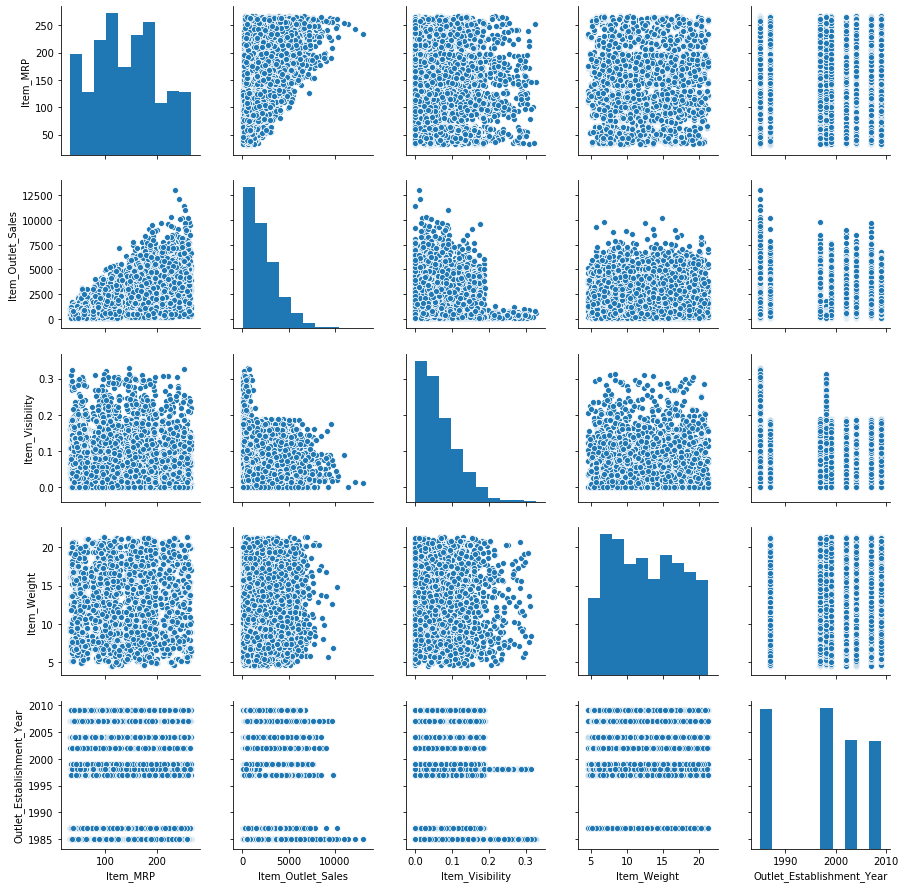

In [33]:
sns.pairplot(bmart)

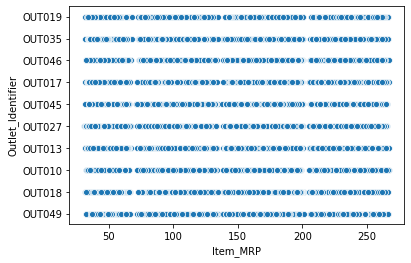

In [34]:

sns.scatterplot(bmart['Item_MRP'],bmart['Outlet_Identifier'])

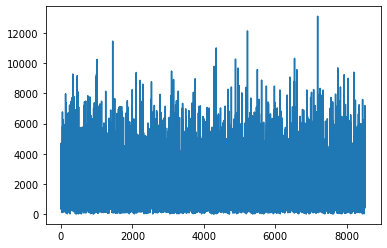

In [35]:
plt.plot(bmart['Item_Outlet_Sales'])

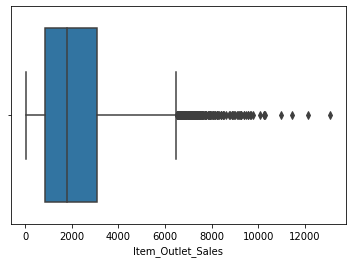

In [36]:
sns.boxplot(bmart['Item_Outlet_Sales'])

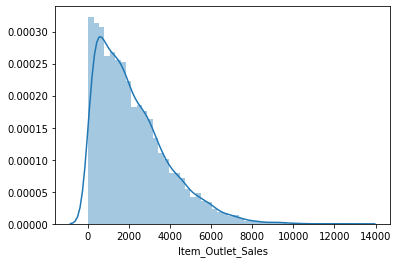

In [37]:
sns.distplot(train['Item_Outlet_Sales'])

In [38]:

# Item Type
bmart['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

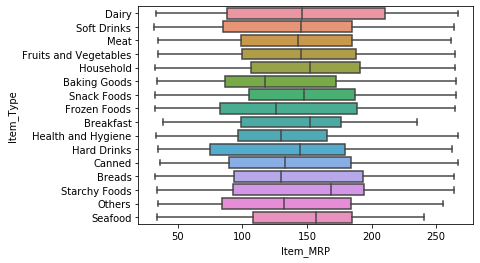

In [39]:
sns.boxplot(y=bmart['Item_Type'],x=bmart['Item_MRP'])

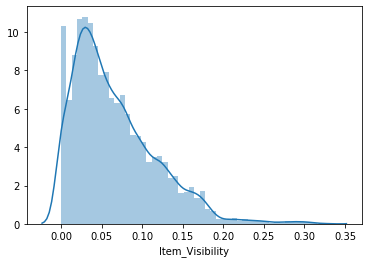

In [40]:
# Item_Visibility
sns.distplot(bmart['Item_Visibility'])

In [41]:
bmart['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

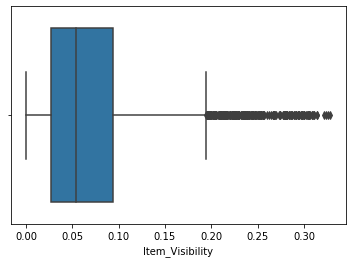

In [42]:
sns.boxplot(bmart['Item_Visibility'])

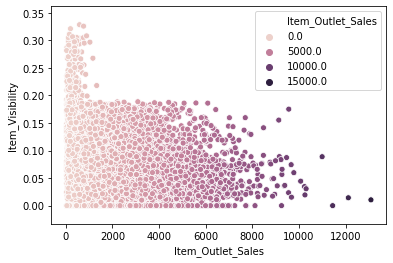

In [43]:
sns.scatterplot(x='Item_Outlet_Sales',y='Item_Visibility',data=bmart,hue='Item_Outlet_Sales')

In [44]:

m3s=np.mean(bmart['Item_Visibility'])+3*np.std(bmart['Item_Visibility'])

In [45]:
print(bmart[bmart['Item_Visibility']>m3s]['Item_Visibility'].count())
print(bmart[bmart['Item_Visibility']>m3s]['Item_Visibility'].count()/bmart.shape[0])

173
0.01217966769923965


In [46]:

p99=np.percentile(bmart['Item_Visibility'],99)

In [47]:
print(bmart[bmart['Item_Visibility']>np.percentile(bmart['Item_Visibility'],99)]['Item_Visibility'].count())
print(bmart[bmart['Item_Visibility']>np.percentile(bmart['Item_Visibility'],99)]['Item_Visibility'].count()/bmart.shape[0])

143
0.010067586595325261


In [48]:

bmart['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [49]:
bmart[bmart['Item_Visibility']>p99].count()

Item_Fat_Content             143
Item_Identifier              143
Item_MRP                     143
Item_Outlet_Sales             81
Item_Type                    143
Item_Visibility              143
Item_Weight                   65
Outlet_Establishment_Year    143
Outlet_Identifier            143
Outlet_Location_Type         143
Outlet_Size                   78
Outlet_Type                  143
dtype: int64

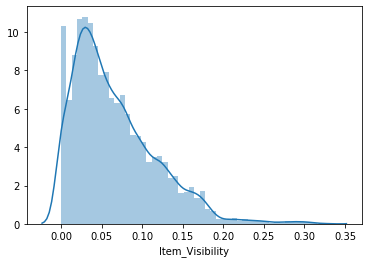

In [50]:
# sns.distplot(np.sqrt(bmart['Item_Visibility']))
sns.distplot(bmart['Item_Visibility'])
plt.show()

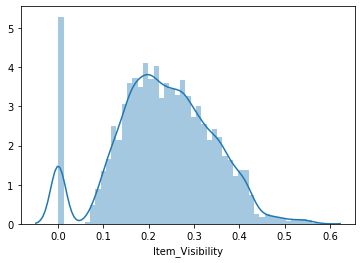

In [51]:

sns.distplot(np.sqrt(bmart['Item_Visibility']))

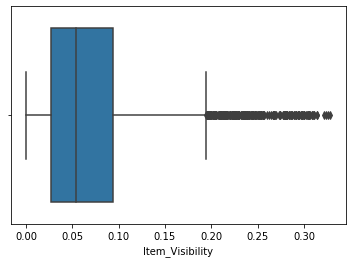

In [52]:
sns.boxplot(bmart['Item_Visibility'])

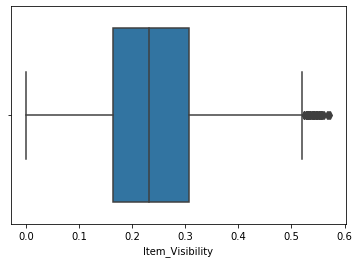

In [54]:

sns.boxplot(np.sqrt(bmart['Item_Visibility']))

In [55]:
bmart['Item_Visibility_SQRT']=np.sqrt(bmart['Item_Visibility'])

In [56]:
#Replacing 0 Item visitbility to mean
mean0=np.mean(bmart[bmart['Item_Visibility_SQRT']>0]['Item_Visibility_SQRT'])
print(mean0)

0.24885661573610723


In [57]:
np.mean(bmart['Item_Visibility_SQRT'])

0.23345637881467396

In [58]:
bmart['Item_Visibility_SQRT']=bmart['Item_Visibility_SQRT'].replace(0,mean0)

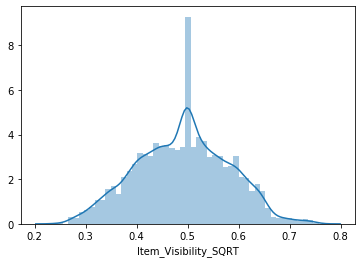

In [59]:
sns.distplot(np.sqrt(bmart['Item_Visibility_SQRT']))

In [60]:

bmart.head(20)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility_SQRT
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,0.126678
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,0.138846
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,0.129461
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,0.248857
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,0.248857
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,0.248857
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,0.112876
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,0.357029
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,0.129179
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,0.307327


In [61]:
bmart.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Item_Visibility_SQRT            0
dtype: int64

In [62]:

# t1=bmart[["Item_Visibility","Item_Visibility_SQRT"]]
# t1.to_csv("test.csv")
os.getcwd()

'E:\\IMS Proschool\\Linear regression'

In [63]:
bmart['Item_Weight'].isnull().sum()

2439

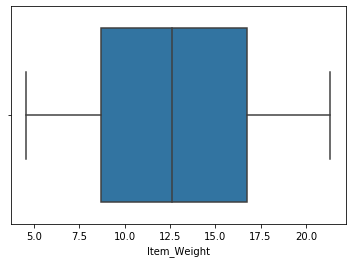

In [64]:
sns.boxplot(bmart['Item_Weight'])

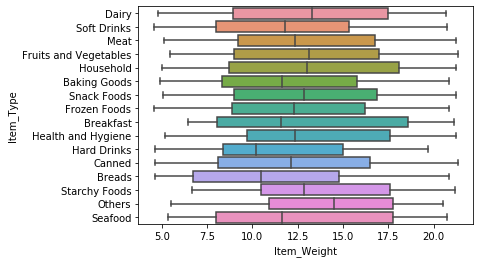

In [65]:
sns.boxplot(x=bmart['Item_Weight'],y=bmart['Item_Type'])

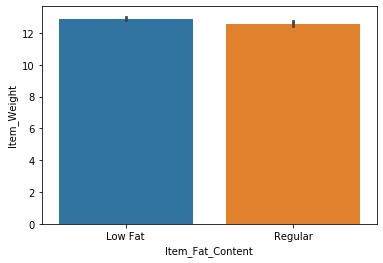

In [66]:
sns.barplot(x=bmart['Item_Fat_Content'],y=bmart['Item_Weight'])

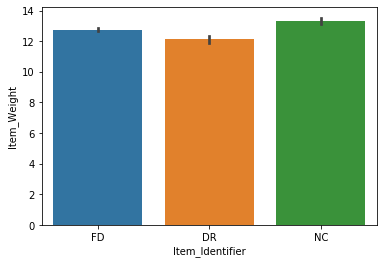

In [67]:
sns.barplot(x=bmart['Item_Identifier'].str[:2],y=bmart['Item_Weight'])

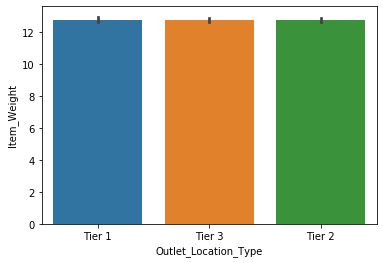

In [68]:

sns.barplot(x=bmart['Outlet_Location_Type'],y=bmart['Item_Weight'])

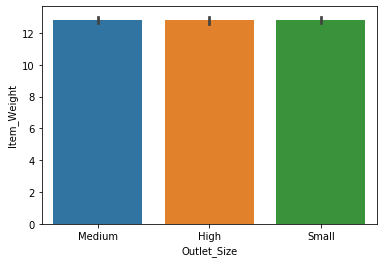

In [69]:
sns.barplot(x=bmart['Outlet_Size'],y=bmart['Item_Weight'])

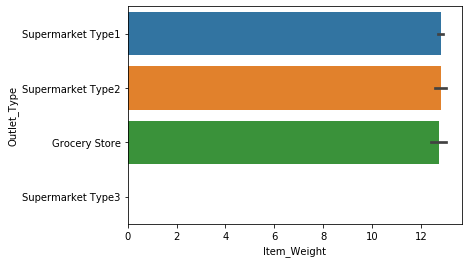

In [70]:
sns.barplot(y=bmart['Outlet_Type'],x=bmart['Item_Weight'])

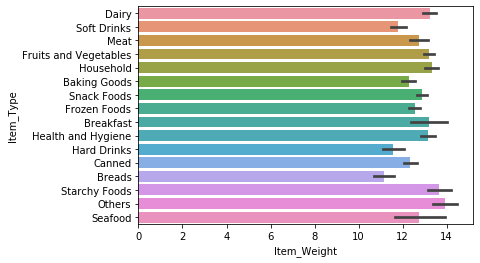

In [71]:
sns.barplot(y=bmart['Item_Type'],x=bmart['Item_Weight'])

In [72]:

pd.crosstab(bmart['Item_Type'],bmart['Item_Weight'].isnull())

Item_Weight,False,True
Item_Type,,
Baking Goods,900,186
Breads,343,73
Breakfast,152,34
Canned,898,186
Dairy,941,195
Frozen Foods,1175,251
Fruits and Vegetables,1667,346
Hard Drinks,303,59
Health and Hygiene,710,148


In [73]:
bmart['Item_Weight']=bmart['Item_Weight'].fillna(bmart['Item_Weight'].groupby(bmart['Item_Type']).transform('mean'))

In [74]:
bmart['Item_Weight'].isnull().sum()

0

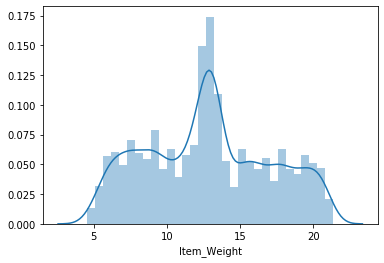

In [75]:
sns.distplot(bmart['Item_Weight'])

In [76]:
bmart['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [77]:
bmart['Tenure']=2020-bmart['Outlet_Establishment_Year']

In [78]:
bmart['Tenure'].describe()

count    14204.000000
mean        22.169319
std          8.371664
min         11.000000
25%         16.000000
50%         21.000000
75%         33.000000
max         35.000000
Name: Tenure, dtype: float64

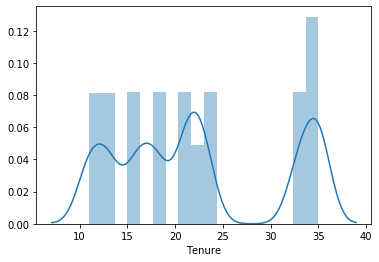

In [79]:
sns.distplot(bmart['Tenure'])

In [80]:
bmart['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [81]:
bmart['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [82]:
pd.crosstab(bmart['Outlet_Location_Type'],bmart['Outlet_Identifier'])

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Location_Type,,,,,,,,,,
Tier 1,0,0,0,0,880,0,0,0,1550,1550
Tier 2,0,0,1543,0,0,0,1550,1548,0,0
Tier 3,925,1553,0,1546,0,1559,0,0,0,0


In [83]:
bmart['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [84]:

bmart['Outlet_Size'].isnull().sum()

4016

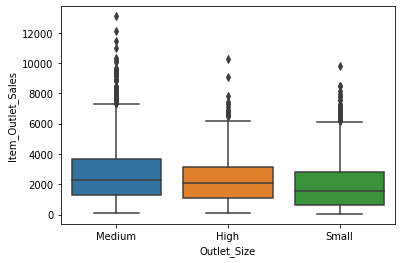

In [85]:
sns.boxplot(bmart['Outlet_Size'],bmart['Item_Outlet_Sales'])

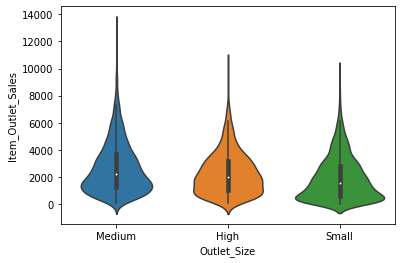

In [86]:
sns.violinplot(bmart['Outlet_Size'],bmart['Item_Outlet_Sales'])

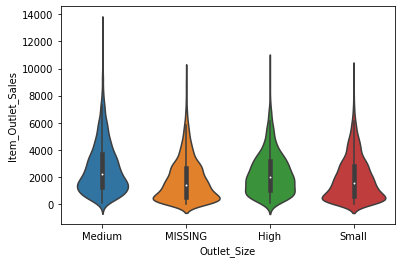

In [87]:
sns.violinplot(bmart['Outlet_Size'].fillna("MISSING"),bmart['Item_Outlet_Sales'])

In [88]:
bmart['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [89]:
bmart['Outlet_Size']=bmart['Outlet_Size'].fillna("Small")

In [90]:
bmart['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

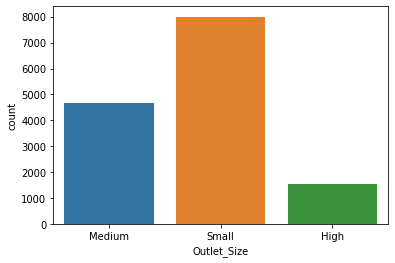

In [91]:
sns.countplot(bmart['Outlet_Size'])

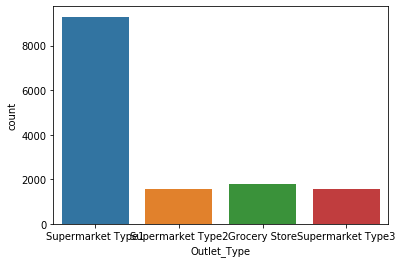

In [92]:
sns.countplot(bmart['Outlet_Type'])

In [93]:
bmart['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [94]:

bmart.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
Item_Visibility_SQRT            0
Tenure                          0
dtype: int64

In [96]:
print(bmart.shape)


(14204, 14)


In [97]:
bmart.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility_SQRT,Tenure
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,0.126678,21
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,0.138846,11


In [98]:
bmart['Item_Identifier_1']=bmart['Item_Identifier'].str[:2]

In [99]:
bmart.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
Item_Visibility_SQRT            0
Tenure                          0
Item_Identifier_1               0
dtype: int64

In [100]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 15 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
Item_Visibility_SQRT         14204 non-null float64
Tenure                       14204 non-null int64
Item_Identifier_1            14204 non-null object
dtypes: float64(5), int64(2), object(8)
memory usage: 2.0+ MB


In [101]:
bmart.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility_SQRT,Tenure,Item_Identifier_1
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,0.126678,21,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,0.138846,11,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,0.129461,21,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,0.248857,22,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,0.248857,33,NC


In [102]:
train_cl=bmart[bmart['Item_Outlet_Sales'].notnull()]
test_cl=bmart[bmart['Item_Outlet_Sales'].isnull()]

In [103]:

train_cl.drop(['Item_Identifier','Item_Visibility','Outlet_Establishment_Year'],axis=1,inplace=True)

In [104]:
train_cl.isnull().sum()

Item_Fat_Content        0
Item_MRP                0
Item_Outlet_Sales       0
Item_Type               0
Item_Weight             0
Outlet_Identifier       0
Outlet_Location_Type    0
Outlet_Size             0
Outlet_Type             0
Item_Visibility_SQRT    0
Tenure                  0
Item_Identifier_1       0
dtype: int64

In [105]:

train_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Fat_Content        8523 non-null object
Item_MRP                8523 non-null float64
Item_Outlet_Sales       8523 non-null float64
Item_Type               8523 non-null object
Item_Weight             8523 non-null float64
Outlet_Identifier       8523 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Size             8523 non-null object
Outlet_Type             8523 non-null object
Item_Visibility_SQRT    8523 non-null float64
Tenure                  8523 non-null int64
Item_Identifier_1       8523 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [106]:
test_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 15 columns):
Item_Fat_Content             5681 non-null object
Item_Identifier              5681 non-null object
Item_MRP                     5681 non-null float64
Item_Outlet_Sales            0 non-null float64
Item_Type                    5681 non-null object
Item_Visibility              5681 non-null float64
Item_Weight                  5681 non-null float64
Outlet_Establishment_Year    5681 non-null int64
Outlet_Identifier            5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Size                  5681 non-null object
Outlet_Type                  5681 non-null object
Item_Visibility_SQRT         5681 non-null float64
Tenure                       5681 non-null int64
Item_Identifier_1            5681 non-null object
dtypes: float64(5), int64(2), object(8)
memory usage: 710.1+ KB


In [107]:
test_cl.drop(['Item_Identifier','Item_Visibility','Outlet_Establishment_Year'],axis=1,inplace=True)

In [108]:

print(train_cl.shape)
print(test_cl.shape)

(8523, 12)
(5681, 12)


In [109]:
train_cl=pd.get_dummies(train_cl,drop_first=True)
test_cl=pd.get_dummies(test_cl,drop_first=True)

In [110]:
print(train_cl.shape)
print(test_cl.shape)

(8523, 39)
(5681, 39)
